## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle

sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils, file_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
full_filtered_df = pd.read_csv('../../active_fastas/rna_seq.csv')
full_filtered_norm_df = full_filtered_df

num_genes = full_filtered_df.shape[0]
num_genes

21524

In [3]:
full_filtered_df.sample(10)

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
4105,TTHERM_00521970,1.806613,0.488283,0.141915,0.580417,-0.196448,1.209546,-1.238032,-1.296446,-0.777411
5989,TTHERM_000425879,-1.148655,-0.013072,-0.457693,1.336095,1.201026,0.828205,1.170564,-1.726503,-0.540130
3931,TTHERM_00624610,-0.381736,-0.530974,-0.275592,-0.000211,0.064185,0.632495,-0.539655,-0.935572,-1.188940
906,TTHERM_00537100,0.114483,2.262740,0.149443,0.334352,0.764591,1.414333,-0.529000,-1.017631,-1.615432
15263,YF00023750.t1,0.770767,-0.460378,-0.912902,-0.906249,-0.853008,-0.581160,-0.508303,-0.024235,0.545630
10014,TTHERM_000661569,0.319072,0.607894,0.900076,1.085804,1.075712,1.034977,-0.011242,-0.140730,-0.402733
13471,TTHERM_00317220,-2.468592,-0.742207,0.842828,1.580034,2.076910,1.167236,-0.013517,-0.912086,-1.168263
7663,TTHERM_00483470,2.380379,1.534231,0.036434,0.499410,0.148870,-0.504782,-0.868843,-0.379856,-0.864371
14047,YF00021955.t1,2.337579,0.472621,-0.035231,-0.169394,-0.033753,-0.343036,-0.863415,-0.061402,0.688801
3325,TTHERM_00723650,-2.121835,-0.506541,0.332685,0.909250,1.724031,1.106106,-0.112824,-0.498247,-0.711212


In [4]:
cycle_expression_conflict_df = full_filtered_df.loc[
    (full_filtered_df['000min'] > 0.9)
    &
    (full_filtered_df['210min'] < 0.1)
    &
    (full_filtered_df['240min'] < 0.1)
]

In [5]:
cycle_expression_conflict_df

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
0,TTHERM_00161861,1.087494,0.062343,0.288486,1.121427,0.938596,0.513654,0.588010,-0.395171,-1.189078
6,TTHERM_000161789,2.781482,1.003143,-0.861583,-1.065768,0.606502,0.115310,0.700044,-0.501116,-0.040519
8,TTHERM_00161780,1.096049,0.842081,0.198487,0.457871,0.543836,1.701776,0.483856,-0.802495,-1.235445
18,TTHERM_00161670,1.460445,-0.524039,-0.931117,-0.712812,0.238562,0.210397,-0.079935,-0.412285,-1.145525
24,TTHERM_00161580,1.740777,1.476005,0.294685,0.002938,-0.017767,0.550469,-0.449770,-0.599137,-0.445851
...,...,...,...,...,...,...,...,...,...,...
21515,YF00038368.t1,1.226718,-0.519094,-0.906267,-0.018819,0.089214,1.807650,-0.103961,-0.789088,-0.519985
21518,TTHERM_01068130,0.940676,0.477967,-1.429256,-1.575640,-1.042108,1.971190,-0.035602,-0.782939,-0.247323
21521,YF00038377.t1,1.720627,-0.790350,-0.928691,-0.618612,-0.682176,-0.412277,-0.279209,-0.345607,-0.571169
21522,TTHERM_000989489,0.957801,0.686296,0.501818,0.215133,0.855592,1.710860,0.331049,-0.390257,-1.067982


In [6]:
cycle_expression_conflict_df.to_csv('./cycle_expression_conflict.csv')

### LEIDEN CLUSTERING

In [7]:
phases = 'rna_seq'

In [8]:
metric = 'manhattan'
# metric='minkowski_3.0'

# resolution_param=0.050
resolution_param=0.005

n_neighbors = 3

In [9]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_df, 
    metric=metric, 
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [10]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

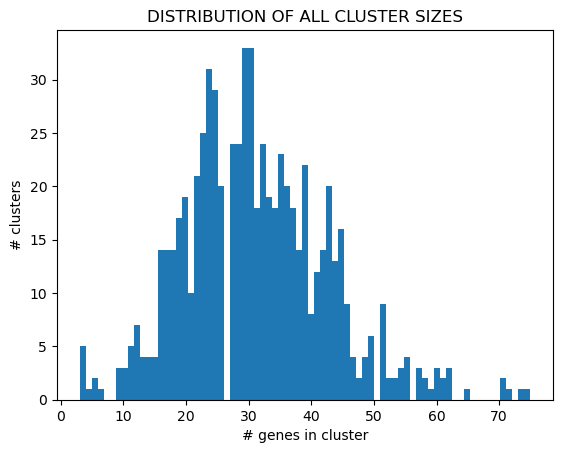

In [11]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

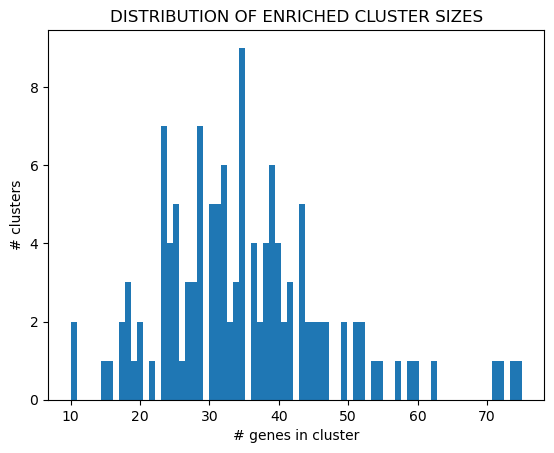

In [12]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [13]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.0482023972907416
                  modularity: 0.8128371877018674
                   nclusters: 691
           mean_cluster_size: 31.14905933429812
         median_cluster_size: 30.0
             sd_cluster_size: 11.531097254417528
          nenriched_clusters: 127
  mean_enriched_cluster_size: 35.196850393700785
median_enriched_cluster_size: 34.0
    sd_enriched_cluster_size: 12.374751644738433
     nenriched_cluster_genes: 4470
                    datetime: 2024-05-06 17:45:09.646806


In [14]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [15]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [16]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [17]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [18]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [19]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [20]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [21]:
embedding_metric = 'manhattan'

merge = bokeh_ui_utils.generate_server_data(full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, 'rna_seq', color_palette, n_neighbors=n_neighbors, random_state=42, embedding_metric=embedding_metric, z=True)

In [22]:
merge.head()

,TTHERM_ID,label,000min,030min,060min,090min,120min,150min,180min,210min,...,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,expr_xs,expr_ys,module
0,YF00037523.t1,690,3.253222,0.648170,0.266493,-1.222329,-0.291279,-0.800652,-1.017794,0.529477,...,-,"ko00000,ko01000,ko01002,ko03110",-,-,-,-,-,"[000min, 030min, 060min, 090min, 120min, 150mi...","[3.2532215120689405, 0.6481695209991544, 0.266...",m0690
1,YF00036127.t1,690,2.426156,0.092037,-0.086234,-0.959630,-0.896478,-0.681325,-1.108527,-0.701156,...,-,-,-,-,-,-,-,"[000min, 030min, 060min, 090min, 120min, 150mi...","[2.426155513389898, 0.0920366763620973, -0.086...",m0690
2,YF00031805.t1,690,1.415519,0.056587,2.941666,-0.571057,0.629729,0.580799,-0.805501,-1.044209,...,-,-,-,-,-,-,-,"[000min, 030min, 060min, 090min, 120min, 150mi...","[1.415518664443241, 0.0565868191192094, 2.9416...",m0690
3,YF00030145.t1,690,1.312867,0.474594,2.001869,-0.832168,0.620489,-0.906593,-0.765402,0.746081,...,-,-,-,-,-,-,-,"[000min, 030min, 060min, 090min, 120min, 150mi...","[1.3128665611119286, 0.4745942797988848, 2.001...",m0690
4,YF00028898.t1,690,0.454286,-0.028008,1.375682,-0.717087,-0.604286,-0.140154,-0.956013,-0.573235,...,-,-,-,-,-,-,-,"[000min, 030min, 060min, 090min, 120min, 150mi...","[0.4542863945729057, -0.0280079186726878, 1.37...",m0690


In [23]:
merge.columns

Index(['TTHERM_ID', 'label', '000min', '030min', '060min', '090min', '120min',
       '150min', '180min', '210min', '240min', 'x', 'y', 'seed_ortholog',
       'evalue', 'score', 'eggNOG_OGs', 'max_annot_lvl', 'COG_category',
       'Description', 'Preferred_name', 'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway',
       'KEGG_Module', 'KEGG_Reaction', 'KEGG_rclass', 'BRITE', 'KEGG_TC',
       'CAZy', 'BiGG_Reaction', 'PFAMs', 'TGD2021_description', 'expr_xs',
       'expr_ys', 'module'],
      dtype='object')

In [24]:
with open('./server_data.pkl', 'wb') as f:
    pickle.dump(merge, f)